* 1. Problem defination
* 2. Data 
* 3. Evaluation
* 4. Features
* 5. Modelling
* 6. Experimentation

# Data
> The original data came from Cleavland data from the UCI Machine Learning Repository
https://archive.ics.uci.edu/ml/datasets/heart+Disease

> There is also a version of it available on Kaggle. https://www.kaggle.com/ronit/heart-disease-uci


# Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proff of concept, we'll pursue the project.


# Features

> Information on data

**Create data dictionary**

* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
-- Value 0: upsloping
-- Value 1: flat
-- Value 2: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
* and the label condition: 0 = no disease, 1 = disease

In [87]:
# Preparing tools

#Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
# we want our plots to appear inside the notebook

#Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Loading data

In [2]:
hd = pd.read_csv("heart-disease.csv")
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [17]:
hd.shape # (rows, columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

1. What questions am I trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do I deal with it?
4. Where are the outliers and why should I care about them?
5. How can I add, change or remove features to get more out of data?


In [19]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
hd.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [21]:
# lets find out how many each class there are?
hd.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

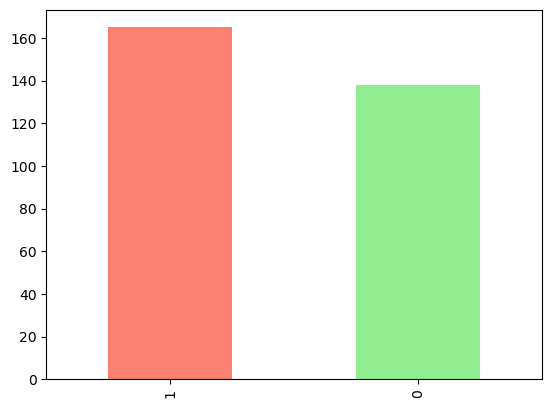

In [23]:
hd.target.value_counts().plot(kind = "bar", color = ["salmon", "lightgreen"])

In [25]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [28]:
# are there any missing values
hd.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [31]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [32]:
hd.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [35]:
# Comparing target column with sex column
pd.crosstab(hd.target, hd.sex)

sex,0,1
target,,
0,24,114
1,72,93


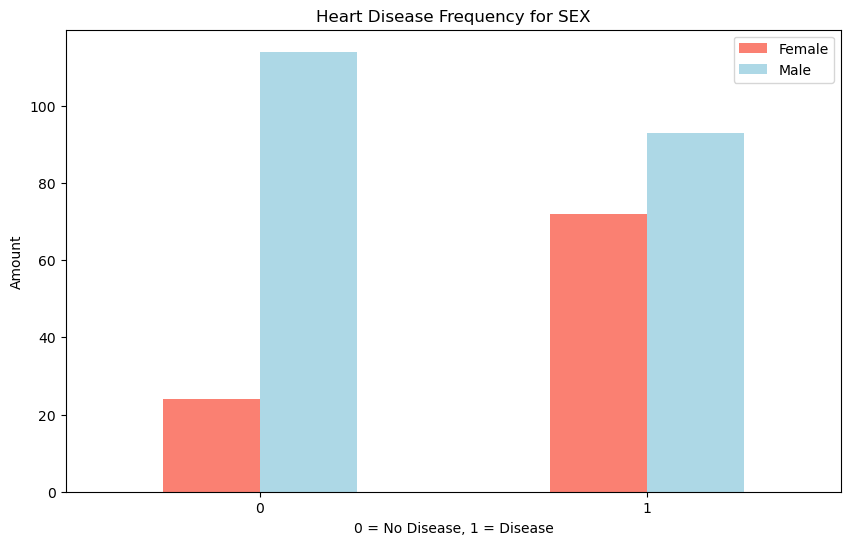

In [45]:
# Create a plot for crosstab
pd.crosstab(hd.target, hd.sex).plot(kind = "bar",
                                   figsize = (10, 6),
                                   color = ["salmon", "lightblue"])
 
plt.title("Heart Disease Frequency for SEX")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0); # for 0 and 1 at the horizontal line at the bottom

In [47]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [48]:
hd.thalach.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

# Age vs max heart disease for heart disease

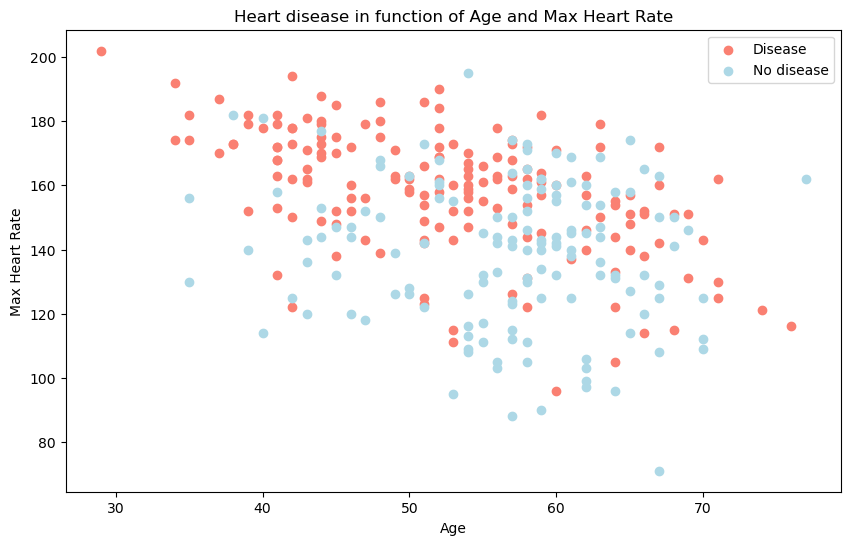

In [54]:
# creating another figure
plt.figure(figsize = (10, 6))

# Scatter with positive examples
plt.scatter(hd.age[hd.target == 1],
           hd.thalach[hd.target == 1],
           c = "salmon")

# Scatter with negative examples
plt.scatter(hd.age[hd.target == 0],
           hd.thalach[hd.target == 0],
           c = "lightblue")

# Add some helpful info
plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No disease"])

<AxesSubplot:ylabel='Frequency'>

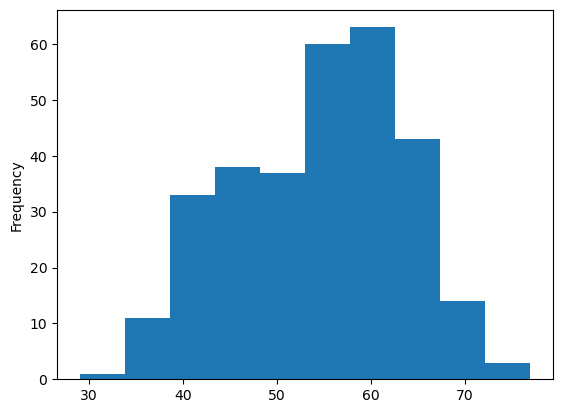

In [55]:
# Check the distribution of age column with a histogram
hd.age.plot.hist()

### Heart disease frequency for chest pain

In [57]:
pd.crosstab(hd.cp, hd.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

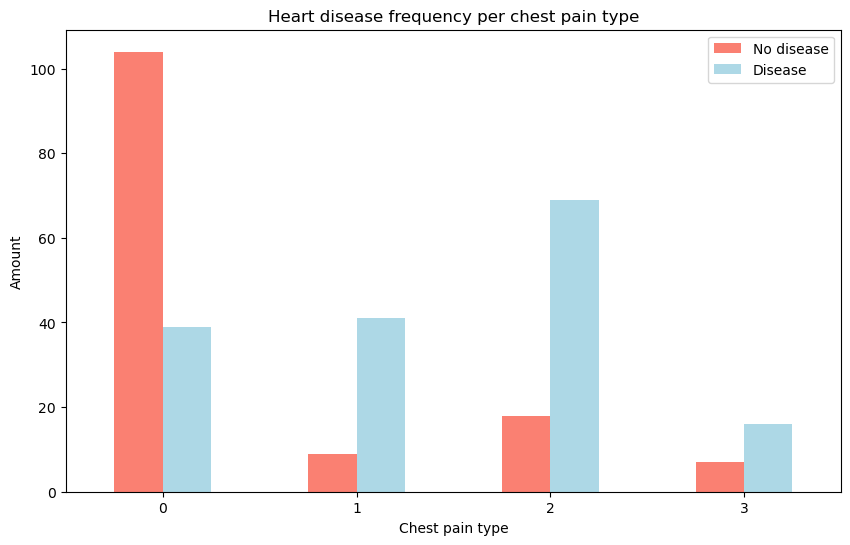

In [59]:
# make the crosstab more visual
pd.crosstab(hd.cp, hd.target).plot(kind = "bar",
                                  figsize = (10, 6),
                                  color = ["salmon", "lightblue"])

#add some communication
plt.title("Heart disease frequency per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No disease", "Disease"])
plt.xticks(rotation = 0)

In [60]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [62]:
# Make a correlation matrix
hd.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


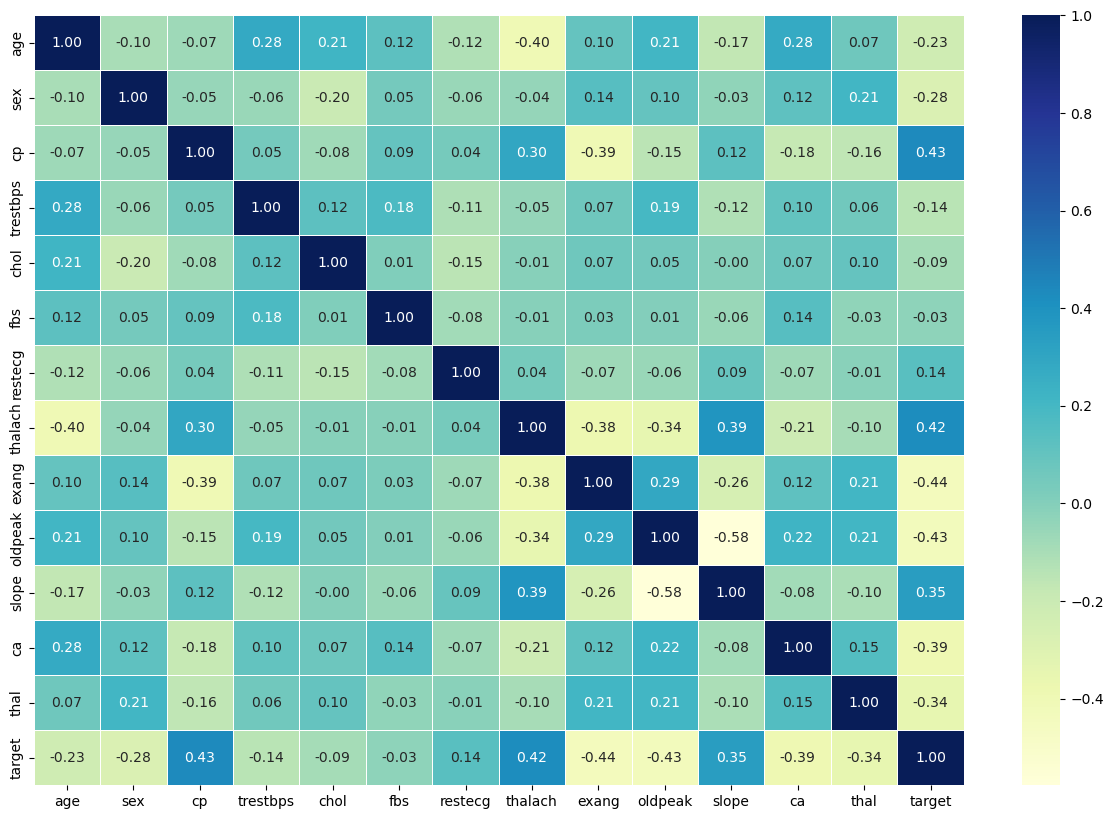

In [100]:
# making correlation matrix a little prettier
corr_matrix = hd.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidth = 0.5,
                fmt = ".2f",
                cmap = "YlGnBu");


# 5. Modelling

In [70]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [79]:
# splitting data into X and y
X = hd.drop("target", axis = 1)
y = hd.target

# setting random seed
np.random.seed(42)

# splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Building a model

* find patterns on train set
* use pattern on test set

### trying 3 different machine learning models
* Logistic regression
* K-neareset neighbors classifier
* Random Foreset Classifier

In [91]:
 # Putting models in a dictionary
models = {"Logistic Regression" : LogisticRegression(),
         "KNN" : KNeighborsClassifier(),
         "Random Forest" : RandomForestClassifier()}

# Create a function to fit and find score of models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels
    """
    # Setting random seeds
    np.random.seed(42)
    
    # Making a dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        #Fitting the model in data
        model.fit(X_train, y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [92]:
model_scores = fit_and_score(models = models,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)

model_scores

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this 

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model comparision

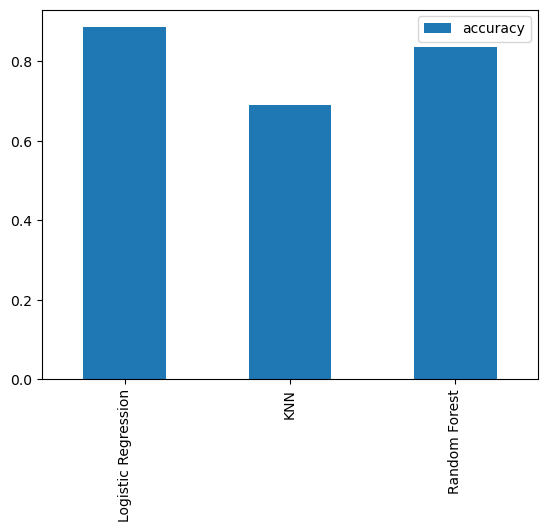

In [98]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar();

#### we've got a baseline model and we know our model first prediction aren't always to be considered the best technic
* Hyperparameter tuning
* Feature importance 
* Confusion matrix
* Cross-validation metrics
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve AUC

## Hyperparameter tuning

In [112]:
# Tuning KNN

train_scores = []
test_scores = []

# Creating list of different for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test)) 
    

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

''

In [105]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


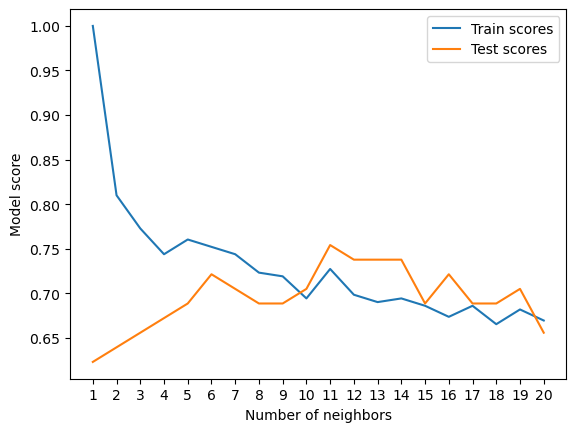

In [111]:
plt.plot(neighbors, train_scores, label = "Train scores")
plt.plot(neighbors, test_scores, label = "Test scores")
plt.xlabel("Number of neighbors")
plt.xticks(np.arange(1, 21, 1))
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## KNN has not reached to our expected score so we discard this model
## This was one of the parts of our experiment

# Hyperparameter tuning with randomized search CV

#### Tuning,
* Logistic Regression()
* RandomForestClassifier()


    ... using RandomizedSearchCV


In [115]:
# hyperparameters for logistic regression model in a grid
log_reg_grid = {"C" : np.logspace(-4, 4, 20),
               "solver" : ["liblinear"]}

# hyperparameters for random forest classifier in a grid
rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
          "max_depth" : [None, 3, 5, 10],
          "min_samples_split" : np.arange(2, 20, 2),
          "min_samples_leaf" : np.arange(1, 20, 2)}

In [116]:
# Tuning logistic regression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)

# Fit random hyperparameter search model for logistic Regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [117]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [118]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [120]:
# Tuning RandomForestClassifier()

np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier()
rs_clf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [121]:
rs_clf.score(X_test, y_test)

0.8688524590163934

In [125]:
rs_clf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

## Using grid search CV

Since our logistic regression model provides the best score so far, try to improve it using grid search CV

In [127]:
# Different hyperparameters for out logistic Regression model
log_reg_grid = {"C" : np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# Setup grid hyperparameter search fpr Logistic Regresison model
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv = 5,
                          verbose = True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [128]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [129]:
# Evaluate our grid search Logistic regression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

* Hyperparameter tuning
* Feature importance 
* Confusion matrix
* Cross-validation metrics
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve AUC

# Beyond accuracy

In [131]:
# To make comparisions and evalate our model, we need to make predictions
y_preds = gs_log_reg.predict(X_test)

In [132]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


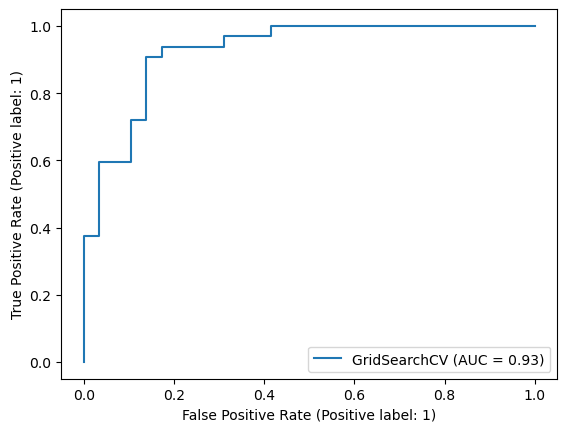

In [133]:
# Plot roc curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

In [134]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


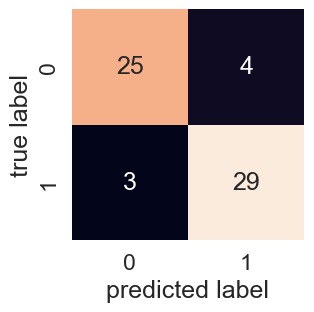

In [139]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plot a nice looking confusion matrix using Seaborn's heatmap()"""
    fig, ax = plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("predicted label")
    plt.ylabel("true label")
    
plot_conf_mat(y_test, y_preds)
    

In [140]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61




* Precision is a model score which produces no false positive(predicts class 1 correctly) - (False negative)
* Recall indicates the score which predicts true positive correctly(which produces no false negatives) - (Falso Positive)
* F1 is a combination of precision and recall
* Suppoer is a number of samples each metric was calculated on.


# Calculating evaluation matrix using Cross Validation

* cross_val_score()


In [199]:
# Checking best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [200]:
# Creating new classifier with best parameters
clf = LogisticRegression(C = 0.20433597178569418,
                        solver = "liblinear")

In [201]:
# Cross validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring = "accuracy");

cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [202]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [203]:
# Cross validated f1 score
cv_f1 = cross_val_score(clf,
                       X,
                       y,
                       cv = 5,
                       scoring = "f1")
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [204]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

In [205]:
# Cross validated recall
cv_recall = cross_val_score(clf,
                           X,
                           y,
                           cv = 5,
                           scoring = "recall")
cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [206]:
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [207]:
# Cross validation precision
cv_precision = cross_val_score(clf,
                              X,
                              y,
                              cv = 5,
                              scoring = "precision")
cv_precision

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [208]:
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [224]:
import importlib; importlib.reload(pd)
# assigned value to pandas built in function so calling this library to fix it.

<module 'pandas' from 'C:\\Users\\User\\anaconda3\\lib\\site-packages\\pandas\\__init__.py'>

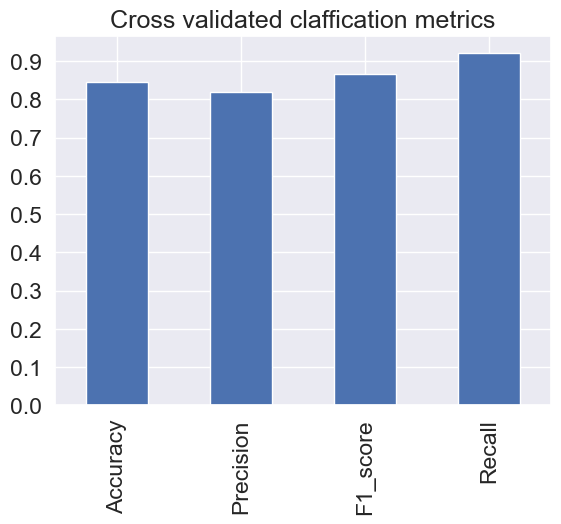

In [232]:
# Visualizing our cross validated metrics
cv_metric = pd.DataFrame({"Accuracy" : cv_acc,
                            "Precision" : cv_precision,
                             "F1_score" : cv_f1,
                             "Recall" : cv_recall},
                         index = [0])

cv_metric.T.plot(kind = "bar", title = "Cross validated claffication metrics",
                legend = False)
plt.yticks(np.arange(0, 1, .1));


# Feature Importance
* which feature contributed to the model
* how much or how does it contribute

#### Finding feature importance is different for each machine learning model



In [233]:
# Finding feature importance for our Logistic Regression model
# Fit an instance of Logistic Regression

clf = LogisticRegression(C = 0.20433597178569418,
                        solver = "liblinear")
# best parameter from clf.best_params_

clf.fit(X_train, y_train);

In [235]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [234]:
# Checking coefficient
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [236]:
# Match coef's of features to columns
feature_dict = dict(zip(hd.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

<AxesSubplot:title={'center':'Feature Importance'}>

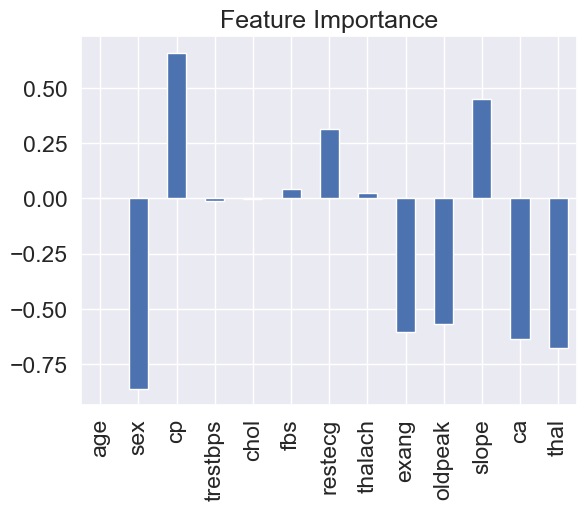

In [242]:
# Visualize feature importance
feature_hd = pd.DataFrame(feature_dict, index = [0])
feature_hd.T.plot.bar(title = "Feature Importance", legend = False)


In [250]:
pd.crosstab(hd.sex, hd.target)

target,0,1
sex,,
0,24,72
1,114,93


## Experimentation

# We could try a better model
# We could improve current model
# might fail
# Takes time

In [258]:
import pickle
pickle.dump(clf, open("heart_disease_pred_clf_model", "wb"))

In [259]:
my_model = pickle.load(open("heart_disease_pred_clf_model" , "rb"))
my_model

LogisticRegression(C=0.20433597178569418, solver='liblinear')